In [1]:
import numpy as np 
import crocoddyl 
import matplotlib.pyplot as plt 


import os, sys
src_path = os.path.abspath('../../') 
sys.path.append(src_path) 

from utils.action_models import penumatic_hopper 
from solvers import furisc
from utils.uncertainty import measurement_models, process_models, problem_uncertainty
from utils.problems import penumatic_hopper_problem 
from hopper_config import *

In [2]:
# setup optimal control problem and solver 
horizon = 100
# uncertainty models 
initial_covariance = 1.e-3 * np.eye(4)
process_noise = 1.e-4*np.eye(4)
measurement_noise = 1.e-5*np.eye(4)
sensitivity = .1
# MAX_ITER = 1

pmodels, umodels = penumatic_hopper_problem.full_state_uniform_hopper(dt, horizon, process_noise, measurement_noise)

problem = crocoddyl.ShootingProblem(x0, pmodels[:-1], pmodels[-1])

irisc_uncertainty = problem_uncertainty.ProblemUncertainty(x0, initial_covariance, umodels)
solver = furisc.FeasibilityRiskSensitiveSolver(problem, irisc_uncertainty, sensitivity)

solver.setCallbacks([
crocoddyl.CallbackLogger(),
crocoddyl.CallbackVerbose()
])

In [3]:
xs = [x0]*(horizon+1)
us = [np.array([0.])]*horizon    
# 
converged = solver.solve(xs,us, MAX_ITER, True)
if not converged:
    print(" uRiSC Solver Did Not Converge ".center(LINE_WIDTH, '!'))
else:
    print(" uRiSC Solver Converged ".center(LINE_WIDTH, '='))


initial cost is 1248.8765928725163
initial trajectory feasibility True


/home/bilal/devel/urisc_dev/workspace/src/urisc/python/urisc/solvers/furisc.py:358: RuntimeWarning: invalid value encountered in log
  ctry =  - self.inv_sigma*np.log(sum(costs))
/home/bilal/devel/urisc_dev/workspace/src/urisc/python/urisc/solvers/furisc.py:358: RuntimeWarning: invalid value encountered in log
  ctry =  - self.inv_sigma*np.log(sum(costs))
/home/bilal/devel/urisc_dev/workspace/src/urisc/python/urisc/solvers/furisc.py:358: RuntimeWarning: divide by zero encountered in log
  ctry =  - self.inv_sigma*np.log(sum(costs))
/home/bilal/devel/urisc_dev/workspace/src/urisc/python/urisc/solvers/furisc.py:358: RuntimeWarning: invalid value encountered in log
  ctry =  - self.inv_sigma*np.log(sum(costs))
/home/bilal/devel/urisc_dev/workspace/src/urisc/python/urisc/solvers/furisc.py:358: RuntimeWarning: invalid value encountered in log
  ctry =  - self.inv_sigma*np.log(sum(costs))
/home/bilal/devel/urisc_dev/workspace/src/urisc/python/urisc/solvers/furisc.py:358: RuntimeWarning: inva

Line search is not making any improvements
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! uRiSC Solver Did Not Converge !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


------------------------------------- Plotting uRiSC Solution --------------------------------------


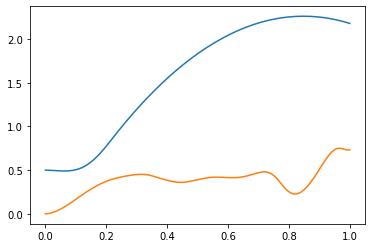

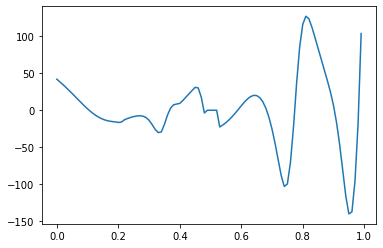

In [4]:
print(" Plotting uRiSC Solution ".center(LINE_WIDTH, '-'))
time_array = dt*np.arange(horizon+1)
#
plt.figure("trajectory plot")
plt.plot(time_array,np.array(solver.xs)[:,0], label="Mass Height")
plt.plot(time_array,np.array(solver.xs)[:,1], label="Piston Height")
#
plt.figure("control inputs")
plt.plot(time_array[:-1],np.array(solver.us)[:], label="control inputs")